<a href="https://colab.research.google.com/github/theresaxx/Financial-Disclosure-NLP-10K/blob/main/3_create_trainvaltest_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Set up Notebook

In [ ]:
import pandas as pd
import numpy as np
import re


In [ ]:
#Declare whether you are on colab or local
colab = True

In [ ]:
if colab==True:
  
  #mount drive
  from google.colab import drive
  drive.mount('/content/drive')


  #set path to folder in Google Drive
  data_path = "/content/drive/MyDrive/Masterthesis/"

Mounted at /content/drive


#### all Items

In [ ]:
#load dataframe
df =  pd.read_csv(data_path+'data/merged/all_merged.csv', index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2178 entries, 1 to 5061
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Symbol_x             2178 non-null   object
 1   url_x                2178 non-null   object
 2   date_filed_x         2178 non-null   object
 3   label_x              2178 non-null   object
 4   rf_disclosure_final  2178 non-null   object
 5   index                2178 non-null   int64 
 6   section7             2178 non-null   object
 7   mda                  2178 non-null   object
 8   qqdmr                2178 non-null   object
dtypes: int64(1), object(8)
memory usage: 170.2+ KB


In [ ]:
#load dataframe labeled
df_label =  pd.read_csv(data_path+'data/labeled_df.csv', index_col=0)
df_label['index_label'] = df_label.index
df_label.head()

,Symbol,url,date_filed,date_until_next_filing_1,stockprice_after_filed,stockprice_before_next_filing,indexprice_after_filed,indexprice_before_next_filing,stockprice_prc,indexprice_prc,real_stock_prc,label,index_label
5676,'A',https://www.sec.gov/Archives/edgar/data/109087...,2009-12-21,2010-12-20,21.587982,28.426323,3.641130e+09,4.736820e+09,1.32,1.30,1.02,performance,5676
5236,'A',https://www.sec.gov/Archives/edgar/data/109087...,2010-12-20,2011-12-16,28.984262,23.254648,1.255820e+03,1.225730e+03,0.80,0.98,0.82,performance,5236
4793,'A',https://www.sec.gov/Archives/edgar/data/109087...,2011-12-16,2012-12-20,24.284693,29.856937,1.219740e+03,1.430470e+03,1.23,1.17,1.05,performance,4793
4343,'A',https://www.sec.gov/Archives/edgar/data/109087...,2012-12-20,2013-12-19,29.363377,40.321888,1.443670e+03,1.786470e+03,1.37,1.24,1.10,performance,4343
3887,'A',https://www.sec.gov/Archives/edgar/data/109087...,2013-12-19,2014-12-22,40.708157,40.110001,1.810250e+03,2.018980e+03,0.99,1.12,0.88,performance,3887


In [ ]:
df1 = df.merge(df_label[['index_label','real_stock_prc', 'Symbol']], how = 'left',
                left_on = 'index', right_on = 'index_label')

In [ ]:
df1.head()

,Symbol_x,url_x,date_filed_x,label_x,rf_disclosure_final,index,section7,mda,qqdmr,index_label,real_stock_prc,Symbol
0,'A',https://www.sec.gov/Archives/edgar/data/109087...,2010-12-20,performance,"Item 1A. Risk Factors Risks, Uncertainties and...",5236,Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,5236,0.82,'A'
1,'A',https://www.sec.gov/Archives/edgar/data/109087...,2011-12-16,performance,"Item 1A. Risk Factors Risks, Uncertainties and...",4793,Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,4793,1.05,'A'
2,'A',https://www.sec.gov/Archives/edgar/data/109087...,2012-12-20,performance,"Item 1A. Risk Factors Risks, Uncertainties and...",4343,Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,4343,1.10,'A'
3,'A',https://www.sec.gov/Archives/edgar/data/109087...,2013-12-19,performance,"ITEM 1A. RISK FACTORS Risks, Uncertainties and...",3887,Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,3887,0.88,'A'
4,'A',https://www.sec.gov/Archives/edgar/data/109087...,2014-12-22,performance,"ITEM 1A. RISK FACTORS Risks, Uncertainties and...",3422,Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,3422,1.01,'A'


In [ ]:
df1.tail()

,Symbol_x,url_x,date_filed_x,label_x,rf_disclosure_final,index,section7,mda,qqdmr,index_label,real_stock_prc,Symbol
2173,'ZBRA',https://www.sec.gov/Archives/edgar/data/877212...,2017-02-27,performance,Item 1A.Risk FactorsInvestors should carefully...,2934,Item 7.Management’s Discussion and Analysis of...,Item 7.Management’s Discussion and Analysis of...,Item 7A. Quantitative and Qualitative Disclosu...,2934,1.14,'ZBRA'
2174,'ZBRA',https://www.sec.gov/Archives/edgar/data/877212...,2018-02-22,performance,Item 1A.Risk FactorsInvestors should carefully...,2460,Item 7.Management’s Discussion and Analysis of...,Item 7.Management’s Discussion and Analysis of...,Item 7A. Quantitative and Qualitative Disclosu...,2460,1.08,'ZBRA'
2175,'ZBRA',https://www.sec.gov/Archives/edgar/data/877212...,2019-02-14,performance,Item 1A.Risk FactorsInvestors should carefully...,1979,Item 7.Management’s Discussion and Analysis of...,Item 7.Management’s Discussion and Analysis of...,Item 7A. Quantitative and Qualitative Disclosu...,1979,1.04,'ZBRA'
2176,'ZBRA',https://www.sec.gov/Archives/edgar/data/877212...,2020-02-13,performance,Item 1A.Risk FactorsInvestors should carefully...,1488,Item 7.Management’s Discussion and Analysis of...,Item 7.Management’s Discussion and Analysis of...,Item 7A. Quantitative and Qualitative Disclosu...,1488,1.52,'ZBRA'
2177,'ZBRA',https://www.sec.gov/Archives/edgar/data/877212...,2021-02-11,performance,Item 1A.Risk FactorsInvestors should carefully...,993,Item 7.Management’s Discussion and Analysis of...,Item 7.Management’s Discussion and Analysis of...,Item 7A. Quantitative and Qualitative Disclosu...,993,0.90,'ZBRA'


In [ ]:
df1.describe()

,index,index_label,real_stock_prc
count,2178.000000,2178.000000,2178.000000
mean,3876.370064,3876.370064,1.083861
std,2165.267001,2165.267001,0.483917
min,500.000000,500.000000,0.120000
25%,2103.250000,2103.250000,0.870000
50%,3549.500000,3549.500000,1.030000
75%,5375.000000,5375.000000,1.190000
max,8402.000000,8402.000000,7.940000


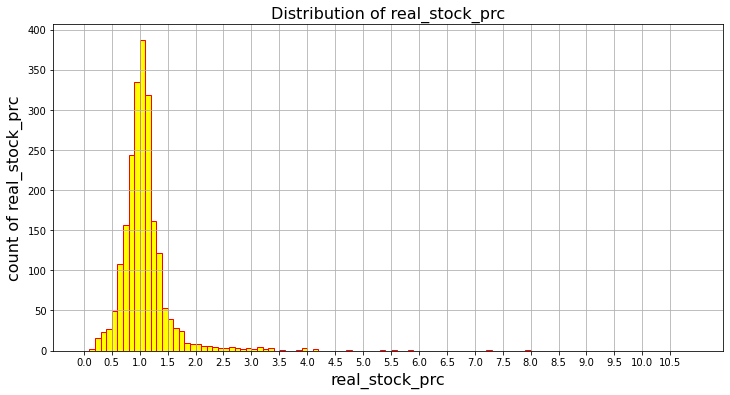

In [ ]:
#visualize label
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

x = df1["real_stock_prc"]
bins=np.arange(0, 11, 0.1)
plt.hist(x, bins=bins, edgecolor="red", color="yellow")
plt.grid(True)
plt.title("Distribution of real_stock_prc", fontsize=16)
plt.xlabel('real_stock_prc', fontsize=16)
ax.set_xticks(np.arange(0, 11, 0.5))
plt.ylabel('count of real_stock_prc',fontsize=16)
plt.show()

In [ ]:
#set new label
def label(value):
    if value < 0.8:
        return "low_performance"
    if value >= 0.8:
        return "performance"
 
df1['new_label'] = df1['real_stock_prc'].map(label)
df1.head()

,Symbol_x,url_x,date_filed_x,label_x,rf_disclosure_final,index,section7,mda,qqdmr,index_label,real_stock_prc,Symbol,new_label
0,'A',https://www.sec.gov/Archives/edgar/data/109087...,2010-12-20,performance,"Item 1A. Risk Factors Risks, Uncertainties and...",5236,Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,5236,0.82,'A',performance
1,'A',https://www.sec.gov/Archives/edgar/data/109087...,2011-12-16,performance,"Item 1A. Risk Factors Risks, Uncertainties and...",4793,Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,4793,1.05,'A',performance
2,'A',https://www.sec.gov/Archives/edgar/data/109087...,2012-12-20,performance,"Item 1A. Risk Factors Risks, Uncertainties and...",4343,Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,4343,1.10,'A',performance
3,'A',https://www.sec.gov/Archives/edgar/data/109087...,2013-12-19,performance,"ITEM 1A. RISK FACTORS Risks, Uncertainties and...",3887,Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,3887,0.88,'A',performance
4,'A',https://www.sec.gov/Archives/edgar/data/109087...,2014-12-22,performance,"ITEM 1A. RISK FACTORS Risks, Uncertainties and...",3422,Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,3422,1.01,'A',performance


In [ ]:
#new label distribution
df_count_label = df1[(df1 ["new_label"] ==  "low_performance")]
df_count_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 25 to 2171
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Symbol_x             381 non-null    object 
 1   url_x                381 non-null    object 
 2   date_filed_x         381 non-null    object 
 3   label_x              381 non-null    object 
 4   rf_disclosure_final  381 non-null    object 
 5   index                381 non-null    int64  
 6   section7             381 non-null    object 
 7   mda                  381 non-null    object 
 8   qqdmr                381 non-null    object 
 9   index_label          381 non-null    int64  
 10  real_stock_prc       381 non-null    float64
 11  Symbol               381 non-null    object 
 12  new_label            381 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 41.7+ KB


#### create df with unbalanced labels

In [ ]:
#create final dataframes
df_dropped = df1.drop(columns = ["Symbol", "real_stock_prc", "index_label", "index", "label_x", "date_filed_x", "url_x", "Symbol_x"])
df_dropped.head()

,rf_disclosure_final,section7,mda,qqdmr,new_label
0,"Item 1A. Risk Factors Risks, Uncertainties and...",Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,performance
1,"Item 1A. Risk Factors Risks, Uncertainties and...",Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,performance
2,"Item 1A. Risk Factors Risks, Uncertainties and...",Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,performance
3,"ITEM 1A. RISK FACTORS Risks, Uncertainties and...",Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,performance
4,"ITEM 1A. RISK FACTORS Risks, Uncertainties and...",Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,performance


In [ ]:
#shuffle dataset
df_dropped_shuffled = df_dropped.sample(frac=1)
#df_dropped_shuffled.head()

In [ ]:
import unicodedata
def remove_accent_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [ ]:
#clean text

def clean_txt(text):

    text = text.replace('\n', ' ') # Replace \n with space
    text = text.replace('\r', '') # \r => space
    text = text.replace('Table of Contents ', ' ')
    
    return text

In [ ]:
mda= clean_txt(df_dropped_shuffled.mda)

In [ ]:
mda

1651    ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...
1737    Item 7. Managements Discussion and Analysis o...
991     ITEM 7. MANAGEMENTS DISCUSSION AND ANALYSIS O...
1286    ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...
1453    Item 7. Managements Discussion and Analysis o...
                              ...                        
257     Item 7. Managements Discussion and Analysis o...
959     Item 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...
1281    Item 7. Managements Discussion and Analysis o...
1705    Item 7. Management’s Discussion and Analysis o...
1013    Item 7. Management’s Discussion and Analysis o...
Name: mda, Length: 2178, dtype: object

In [ ]:
#create train/test/val set for rf
df_rf = df_dropped_shuffled[['rf_disclosure_final', 'new_label']]
df_rf = df_rf.rename({'rf_disclosure_final': 'rf', 'new_label': 'label'}, axis=1)
df_rf.head(1)

,rf,label
1281,Item 1A: Risk Factors RISK FACTORS This annual...,performance


In [ ]:
#save data
path = data_path+'data/train_sets/rf.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_rf.to_csv(f)

In [ ]:
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2178 entries, 1281 to 327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rf      2178 non-null   object
 1   label   2178 non-null   object
dtypes: object(2)
memory usage: 51.0+ KB


In [ ]:
#create df for mda
df_mda = df_dropped_shuffled[['mda', 'new_label']]
df_mda = df_mda.rename({'new_label': 'label'}, axis=1)
df_mda.head(1)

,mda,label
1281,Item 7. Managements Discussion and Analysis o...,performance


In [ ]:
#save data
path = data_path+'data/train_sets/mda.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_mda.to_csv(f)

In [ ]:
#create df for qqdmr
df_qqdmr = df_dropped_shuffled[['qqdmr', 'new_label']]
df_qqdmr = df_qqdmr.rename({'new_label': 'label'}, axis=1)
df_qqdmr.head(1)

,qqdmr,label
1281,Item 7A. Quantitative and Qualitative Disclosu...,performance


In [ ]:
#save data
path = data_path+'data/train_sets/qqdmr.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_qqdmr.to_csv(f)

In [ ]:
#create df for secion 7
df_sec7 = df_dropped_shuffled[['section7', 'new_label']]
df_sec7 = df_sec7.rename({'new_label': 'label'}, axis=1)
df_sec7.head(1)

,section7,label
1281,Item 7. Managements Discussion and Analysis o...,performance


In [ ]:
#save data
path = data_path+'data/train_sets/sec7.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_sec7.to_csv(f)

#### create downsample df

In [ ]:
#shuffle dataset
df_shuffled = df1.sample(frac=1)

In [ ]:
#convert dataframe to even label distribution 
label_1 = df_shuffled[df_shuffled["new_label"] == "low_performance"]
label_0 = df_shuffled[df_shuffled["new_label"] == "performance"]
label_0 = label_0[:381]

In [ ]:
label_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 570 to 1708
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Symbol_x             381 non-null    object 
 1   url_x                381 non-null    object 
 2   date_filed_x         381 non-null    object 
 3   label_x              381 non-null    object 
 4   rf_disclosure_final  381 non-null    object 
 5   index                381 non-null    int64  
 6   section7             381 non-null    object 
 7   mda                  381 non-null    object 
 8   qqdmr                381 non-null    object 
 9   index_label          381 non-null    int64  
 10  real_stock_prc       381 non-null    float64
 11  Symbol               381 non-null    object 
 12  new_label            381 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 41.7+ KB


In [ ]:
#concat to one df
df = pd.concat([label_0, label_1], axis=0)

In [ ]:
df.head()

,Symbol_x,url_x,date_filed_x,label_x,rf_disclosure_final,index,section7,mda,qqdmr,index_label,real_stock_prc,Symbol,new_label
570,'DG',https://www.sec.gov/Archives/edgar/data/29534/...,2012-03-22,performance,ITEM 1A. RISK FACTORS You should carefully con...,6664,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,"Item 7A. ""Quantitative and Qualitative Disclos...",6664,0.94,'DG',performance
215,'APH',https://www.sec.gov/Archives/edgar/data/820313...,2020-02-12,performance,Item 1A. Risk Factors​Investors should careful...,1037,Item 7. Management’s Discussion and Analysis o...,Item 7. Management’s Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,1037,1.09,'APH',performance
472,'CPRT',https://www.sec.gov/Archives/edgar/data/900075...,2012-10-01,performance,Item 1A. Risk Factors Investing in our common ...,4894,Item 7. Managements Discussion and Analysis o...,Item 7. Managements Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,4894,2.05,'CPRT',performance
375,'CDNS',https://www.sec.gov/Archives/edgar/data/813672...,2021-02-22,performance,Item 1A. Risk FactorsOur operations and financ...,582,Item 7. Management’s Discussion and Analysis o...,Item 7. Management’s Discussion and Analysis o...,"Item 7A, “Quantitative and Qualitative Disclos...",582,0.95,'CDNS',performance
1128,'KR',https://www.sec.gov/Archives/edgar/data/56873/...,2021-03-30,performance,ITEM 1A.RISK FACTORS.​There are risks and unce...,775,ITEM 7.MANAGEMENT’S DISCUSSION AND ANALYSIS OF...,ITEM 7.MANAGEMENT’S DISCUSSION AND ANALYSIS OF...,ITEM 7A.QUANTITATIVE AND QUALITATIVE DISCLOSUR...,775,1.32,'KR',performance


In [ ]:
df.describe()

,index,index_label,real_stock_prc
count,762.000000,762.000000,762.000000
mean,3683.632546,3683.632546,0.915919
std,2138.199011,2138.199011,0.457708
min,506.000000,506.000000,0.120000
25%,1846.750000,1846.750000,0.680000
50%,3402.500000,3402.500000,0.795000
75%,5081.250000,5081.250000,1.090000
max,8401.000000,8401.000000,5.870000


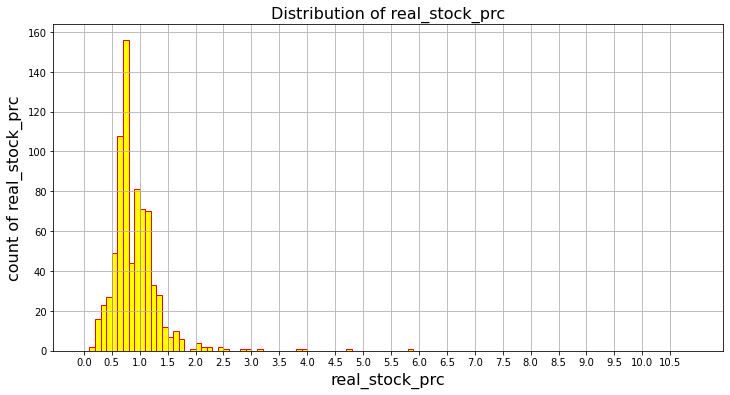

In [ ]:
#visualize label
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

x = df["real_stock_prc"]
bins=np.arange(0, 11, 0.1)
plt.hist(x, bins=bins, edgecolor="red", color="yellow")
plt.grid(True)
plt.title("Distribution of real_stock_prc", fontsize=16)
plt.xlabel('real_stock_prc', fontsize=16)
ax.set_xticks(np.arange(0, 11, 0.5))
plt.ylabel('count of real_stock_prc',fontsize=16)
plt.show()

In [ ]:
#convert label to numerical 
df["new_label"] = df["new_label"].map({"performance": 0, "low_performance": 1})

In [ ]:
df.tail()

,Symbol_x,url_x,date_filed_x,label_x,rf_disclosure_final,index,section7,mda,qqdmr,index_label,real_stock_prc,Symbol,new_label
25,'ABBV',https://www.sec.gov/Archives/edgar/data/155115...,2018-02-16,low_performance,ITEM 1A. RISK FACTORS You should carefully con...,1986,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,ITEM 7A. QUANTITATIVE AND QUALITATIVE DISCLOSU...,1986,0.66,'ABBV',1
174,'ANSS',https://www.sec.gov/Archives/edgar/data/101346...,2016-02-25,low_performance,ITEM 1A.RISK FACTORSInformation provided by th...,2979,ITEM 7.MANAGEMENT'S DISCUSSION AND ANALYSIS OF...,ITEM 7.MANAGEMENT'S DISCUSSION AND ANALYSIS OF...,ITEM 7A.QUANTITATIVE AND QUALITATIVE DISCLOSUR...,2979,0.48,'ANSS',1
1280,'MNST',https://www.sec.gov/Archives/edgar/data/865752...,2009-03-02,performance,Item 1A  Risk Factors). Although our product...,6374,ITEM 7. MANAGEMENTS DISCUSSION AND ANALYSIS O...,ITEM 7. MANAGEMENTS DISCUSSION AND ANALYSIS O...,ITEM 7A. QUANTITATIVE AND QUALITATIVE DISCLOSU...,6374,0.77,'MNST',1
687,'EMN',https://www.sec.gov/Archives/edgar/data/915389...,2014-02-28,performance,ITEM 1A. RISK FACTORSFor identification and di...,4020,ITEM 7.MANAGEMENT'S DISCUSSION AND ANALYSIS OF...,ITEM 7.MANAGEMENT'S DISCUSSION AND ANALYSIS OF...,"Item 7A--""Quantitative and Qualitative Disclos...",4020,0.77,'EMN',1
1278,'MMM',https://www.sec.gov/Archives/edgar/data/66740/...,2020-02-06,low_performance,Item 1A. Risk Factors​Provided below is a caut...,997,Item 7. Management’s Discussion and Analysis o...,Item 7. Management’s Discussion and Analysis o...,"Item 7A, “Quantitative and Qualitative Disclos...",997,0.70,'MMM',1


In [ ]:
#shuffle dataset
df_shuffled = df.sample(frac=1)
df_shuffled.head()

,Symbol_x,url_x,date_filed_x,label_x,rf_disclosure_final,index,section7,mda,qqdmr,index_label,real_stock_prc,Symbol,new_label
1565,'PPG',https://www.sec.gov/Archives/edgar/data/79879/...,2017-02-16,performance,Item 1A. Risk FactorsAs a global manufacturer ...,2818,Item 7. Management’s Discussion and Analysis o...,Item 7. Management’s Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,2818,0.98,'PPG',0
1089,'KIM',https://www.sec.gov/Archives/edgar/data/879101...,2012-02-27,performance,Item 1A. Risk Factors We are subject to certai...,5020,Item 7. Management's Discussion and Analysis o...,Item 7. Management's Discussion and Analysis o...,Item 7A. Quantitative and Qualitative Disclosu...,5020,1.08,'KIM',0
2026,'WAB',https://www.sec.gov/Archives/edgar/data/943452...,2016-02-19,low_performance,Item 1A.RISK FACTORSProlonged unfavorable econ...,3385,Item 7.MANAGEMENT’S DISCUSSION AND ANALYSIS OF...,Item 7.MANAGEMENT’S DISCUSSION AND ANALYSIS OF...,Item 7A.QUANTITATIVE AND QUALITATIVE DISCLOSUR...,3385,0.43,'WAB',1
229,'ATO',https://www.sec.gov/Archives/edgar/data/731802...,2019-11-12,performance,ITEM 1A.Risk Factors.Our financial and operati...,1544,ITEM 7.Management’s Discussion and Analysis of...,ITEM 7.Management’s Discussion and Analysis of...,ITEM 7A.Quantitative and Qualitative Disclosur...,1544,0.79,'ATO',1
1970,'UPS',https://www.sec.gov/Archives/edgar/data/109072...,2013-02-28,performance,Item 1A.Risk FactorsYou should carefully consi...,4743,Item 7.Management’s Discussion and Analysis of...,Item 7.Management’s Discussion and Analysis of...,Item 7A.Quantitative and Qualitative Disclosur...,4743,0.94,'UPS',0


In [ ]:
#create train/test/val set for rf
df_rf = df_shuffled[['rf_disclosure_final', 'new_label']]
df_rf = df_rf.rename({'rf_disclosure_final': 'rf', 'new_label': 'label'}, axis=1)
df_rf.head(1)

,rf,label
1565,Item 1A. Risk FactorsAs a global manufacturer ...,0


In [ ]:
#save data
path = data_path+'data/train_sets/rf_small.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_rf.to_csv(f)

In [ ]:
#create df for mda
df_mda = df_shuffled[['mda', 'new_label']]
df_mda = df_mda.rename({'new_label': 'label'}, axis=1)
df_mda.head(1)

,mda,label
1565,Item 7. Management’s Discussion and Analysis o...,0


In [ ]:
#save data
path = data_path+'data/train_sets/mda_small.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_mda.to_csv(f)

In [ ]:
#create df for qqdmr
df_qqdmr = df_shuffled[['qqdmr', 'new_label']]
df_qqdmr = df_qqdmr.rename({'new_label': 'label'}, axis=1)
df_qqdmr.head(1)

,qqdmr,label
1565,Item 7A. Quantitative and Qualitative Disclosu...,0


In [ ]:
#save data
path = data_path+'data/train_sets/qqdmr_small.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_qqdmr.to_csv(f)